# Estas duas linhas são necessárias para fazer o BRIAN rodar no Google Colab

In [1]:
!pip install brian2
!pip install brian2tools
from brian2 import *

# Reiniciar a simulação

In [2]:
start_scope()  # reseta todos os parâmetros da simulação

# Modelo de Neurônios e Criação de Grupos Neurais de Interesse

In [3]:
# Constantes de interesse 
V_rest = -60*mV
c_m    = 10*nF/mm2
r_m    = 1*Mohm*mm2
A_m    = 0.1*mm2
tau_m   = r_m*c_m  
R_m     = r_m/A_m  
V_reset = -65*mV
V_th    = -50*mV
sigma   = 2*ms


# Equações que descrevem o comportamento do neurônio
modelo_neuronio = '''
dv/dt = -(v-V_rest)/(r_m*c_m) + I*sigma*sqrt(2/tau_m)*xi/(c_m*A_m) : volt (unless refractory)
I : ampere
'''
modelo_de_reset = '''
v = V_reset
'''
psp = '''
v += w
''' 

M1  = NeuronGroup(40, model=modelo_neuronio, threshold='v>V_th', reset=modelo_de_reset ,refractory=1*ms)
M2  = NeuronGroup(40, model=modelo_neuronio, threshold='v>V_th', reset=modelo_de_reset ,refractory=1*ms)
M3  = NeuronGroup(40, model=modelo_neuronio, threshold='v>V_th', reset=modelo_de_reset ,refractory=1*ms)
IG1 = NeuronGroup(120, model=modelo_neuronio, threshold='v>V_th', reset=modelo_de_reset ,refractory=1*ms)
P1  = NeuronGroup(40, model=modelo_neuronio, threshold='v>V_th', reset=modelo_de_reset ,refractory=1*ms)
P2  = NeuronGroup(40, model=modelo_neuronio, threshold='v>V_th', reset=modelo_de_reset ,refractory=1*ms)
P3  = NeuronGroup(40, model=modelo_neuronio, threshold='v>V_th', reset=modelo_de_reset ,refractory=1*ms)
IP1 = NeuronGroup(120, model=modelo_neuronio, threshold='v>V_th', reset=modelo_de_reset ,refractory=1*ms)

# Conexões:  Modelos das Sinapses e Como se Conectam

In [4]:
#==================================================================================================
# Synaptic connection
S1 = Synapses(M1, P1, 'w = 0.30*mV : volt', on_pre=psp) # Synapses(source,target)
S2 = Synapses(M1, P2, 'w = 0.10*mV : volt', on_pre=psp) 
S3 = Synapses(M1, P3, 'w = 0.10*mV : volt', on_pre=psp) 
S4 = Synapses(M2, P1, 'w = 0.10*mV : volt', on_pre=psp) 
S5 = Synapses(M2, P2, 'w = 0.30*mV : volt', on_pre=psp) 
S6 = Synapses(M2, P3, 'w = 0.10*mV : volt', on_pre=psp) 
S7 = Synapses(M3, P1, 'w = 0.10*mV : volt', on_pre=psp) 
S8 = Synapses(M3, P2, 'w = 0.10*mV : volt', on_pre=psp) 
S9 = Synapses(M3, P3, 'w = 0.30*mV : volt', on_pre=psp)  
S10 = Synapses(P1, P1, 'w = 0.30*mV : volt', on_pre=psp) 
S11 = Synapses(P1, P2, 'w = 0.10*mV : volt', on_pre=psp) 
S12 = Synapses(P1, P3, 'w = 0.10*mV : volt', on_pre=psp)
S13 = Synapses(P2, P1, 'w = 0.10*mV : volt', on_pre=psp)
S14 = Synapses(P2, P2, 'w = 0.30*mV : volt', on_pre=psp)
S15 = Synapses(P2, P3, 'w = 0.10*mV : volt', on_pre=psp)
S16 = Synapses(P3, P1, 'w = 0.10*mV : volt', on_pre=psp)
S17 = Synapses(P3, P2, 'w = 0.10*mV : volt', on_pre=psp) 
S18 = Synapses(P3, P3, 'w = 0.30*mV : volt', on_pre=psp)
S19 = Synapses(M1, IG1, 'w = 0.10*mV : volt', on_pre=psp)
S20 = Synapses(M2, IG1, 'w = 0.10*mV : volt', on_pre=psp) 
S21 = Synapses(M3, IG1, 'w = 0.10*mV : volt', on_pre=psp)   
S22 = Synapses(IG1, M1, 'w = -0.20*mV : volt', on_pre=psp)  
S23 = Synapses(IG1, M2, 'w = -0.20*mV : volt', on_pre=psp)    
S24 = Synapses(IG1, M3, 'w = -0.20*mV : volt', on_pre=psp)  
S25 = Synapses(P1, IP1, 'w = 0.10*mV : volt', on_pre=psp)      
S26 = Synapses(P2, IP1, 'w = 0.10*mV : volt', on_pre=psp)   
S27 = Synapses(P3, IP1, 'w = 0.10*mV : volt', on_pre=psp)   
S28 = Synapses(IP1, P1, 'w = -0.20*mV : volt', on_pre=psp)   
S29 = Synapses(IP1, P2, 'w = -0.20*mV : volt', on_pre=psp)    
S30 = Synapses(IP1, P3, 'w = -0.20*mV : volt', on_pre=psp)  # connect(pre,post)

S1.connect(condition='i!=j', p=0.4)
S2.connect(condition='i!=j', p=0.2)
S3.connect(condition='i!=j', p=0.2)
S4.connect(condition='i!=j', p=0.2)
S5.connect(condition='i!=j', p=0.4)
S6.connect(condition='i!=j', p=0.2)
S7.connect(condition='i!=j', p=0.2)
S8.connect(condition='i!=j', p=0.2)
S9.connect(condition='i!=j', p=0.4)
S10.connect(condition='i!=j', p=0.4)
S11.connect(condition='i!=j', p=0.2)
S12.connect(condition='i!=j', p=0.2)
S13.connect(condition='i!=j', p=0.2)
S14.connect(condition='i!=j', p=0.4)
S15.connect(condition='i!=j', p=0.2)
S16.connect(condition='i!=j', p=0.2)
S17.connect(condition='i!=j', p=0.2)
S18.connect(condition='i!=j', p=0.2)
S19.connect(condition='i!=j', p=0.4)
S20.connect(condition='i!=j', p=0.2)
S21.connect(condition='i!=j', p=0.2)
S22.connect(condition='i!=j', p=0.2)
S23.connect(condition='i!=j', p=0.2)
S24.connect(condition='i!=j', p=0.2)
S25.connect(condition='i!=j', p=0.2)
S26.connect(condition='i!=j', p=0.2)
S27.connect(condition='i!=j', p=0.2)
S28.connect(condition='i!=j', p=0.2)
S29.connect(condition='i!=j', p=0.2)
S30.connect(condition='i!=j', p=0.2)

#S.delay = [1,2,3,4]*ms 
#S.w=0.2

# Figura 1 - Show connections ==================================================
#figure(1,figsize=(4,4))
#scatter(S.i, S.j)
#xlabel('Source neuron index')
#ylabel('Target neuron index')

# Medidas Experimentais

In [5]:
Mon1 = StateMonitor(P1, ['v'], record=True)
Mon2 = StateMonitor(P2, ['v'], record=True)
Mon3 = StateMonitor(P3, ['v'], record=True)
spikemon1 = SpikeMonitor(P1)
spikemon2 = SpikeMonitor(P2)
spikemon3 = SpikeMonitor(P3)

poprate1 = PopulationRateMonitor(P1)
poprate2 = PopulationRateMonitor(P2)
poprate3 = PopulationRateMonitor(P3)

# Simulação

In [6]:
M1.v =  -65*mV+10*rand()*mV
M2.v =  -65*mV+10*rand()*mV
M3.v =  -65*mV+10*rand()*mV
IG1.v =  -65*mV+10*rand()*mV
P1.v =  -65*mV+10*rand()*mV
P2.v =  -65*mV+10*rand()*mV
P3.v =  -65*mV+10*rand()*mV
IP1.v =  -65*mV+10*rand()*mV

M1.I = 2.0*nA
M2.I = 2.0*nA
M3.I = 2.0*nA
IG1.I = 2.0*nA
P1.I = 2.0*nA
P2.I = 2.0*nA
P3.I = 2.0*nA
IP1.I = 2.0*nA

duration=100
run(duration*ms)

M3.I = 10.0*nA

duration=500
run(duration*ms)

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.05s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_2', using method 'euler' (took 0.01s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_3', using method 'euler' (took 0.02s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_4', using method 'euler' (took 0.02s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_5', using method 'euler' (took 0.02s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specifi

# Resultados

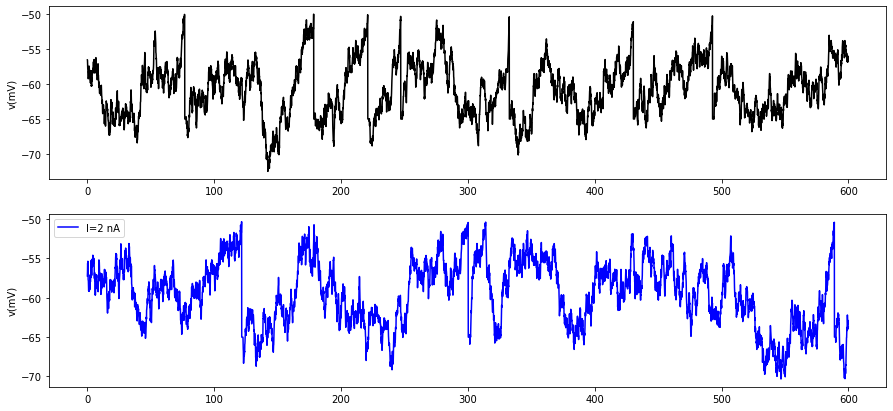

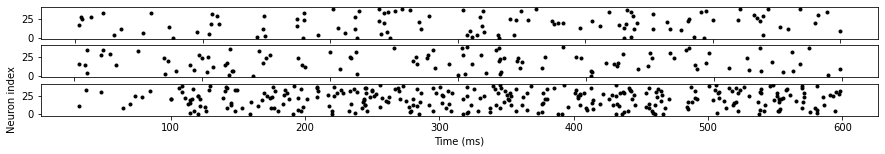

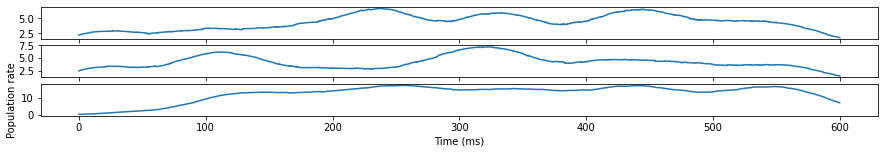

In [7]:
# Figura 2 Voltagens  ==========================================================
figure(2,figsize=(15, 7))
subplot(211)
plot(Mon1.t/ms, Mon1.v[0]/mV, 'k', label='I=1 nA')
ylabel('v(mV)')
subplot(212)
plot(Mon2.t/ms, Mon2.v[1]/mV, 'b', label='I=2 nA')
ylabel('v(mV)')
legend();

# Figura 3 - Potenciais de ação ================================================
figure(3,figsize=(15,2))
subplot(311)
plot(spikemon1.t/ms, spikemon1.i, '.k')
subplot(312)
plot(spikemon2.t/ms, spikemon2.i, '.k')
subplot(313)
plot(spikemon3.t/ms, spikemon3.i, '.k')
#axis([0, duration, -3.1, N+3])
xlabel('Time (ms)')
ylabel('Neuron index');

PopulationRateMonitor.smooth_rate(poprate1, width=50*ms)
PopulationRateMonitor.smooth_rate(poprate2, width=50*ms)
PopulationRateMonitor.smooth_rate(poprate3, width=50*ms)
# Figura 4 - Potenciais de ação ================================================
figure(4,figsize=(15,2))
subplot(311)
plot(poprate1.t/ms, poprate1.smooth_rate(width=25*ms)/Hz)
subplot(312)
plot(poprate2.t/ms, poprate2.smooth_rate(width=25*ms)/Hz)
subplot(313)
plot(poprate3.t/ms, poprate3.smooth_rate(width=25*ms)/Hz)
#axis([0, duration, -3.1, N+3])
xlabel('Time (ms)')
ylabel('Population rate');



show()